In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy


In [2]:
# Load the data 
df = pd.read_excel('TestData1DFull_1m.xls', header=0, index_col=0, parse_dates= True)
# display first few rows
print(df.head(20))
# line plot of dataset


                     RMS_Value
time                          
2019-11-28 07:00:00   0.984083
2019-11-28 07:01:00   1.246701
2019-11-28 07:02:00   1.004492
2019-11-28 07:03:00   0.979750
2019-11-28 07:04:00   0.886278
2019-11-28 07:05:00   0.905190
2019-11-28 07:06:00   0.959868
2019-11-28 07:07:00   0.948778
2019-11-28 07:08:00   0.988192
2019-11-28 07:09:00   0.951107
2019-11-28 07:10:00   0.927097
2019-11-28 07:11:00   0.923010
2019-11-28 07:12:00   0.962012
2019-11-28 07:13:00   0.948916
2019-11-28 07:14:00   0.865217
2019-11-28 07:15:00   0.963713
2019-11-28 07:16:00   0.915931
2019-11-28 07:17:00   0.922979
2019-11-28 07:18:00   0.935591
2019-11-28 07:19:00   0.933210


In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

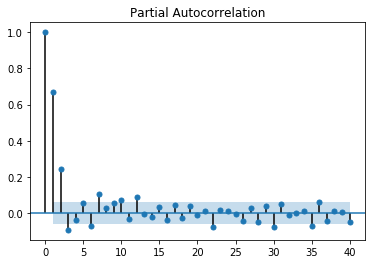

In [4]:
# Plot Partial autocorrelation function 
plot_pacf(df['RMS_Value'], lags=40);

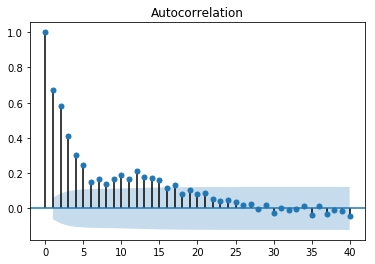

In [5]:
# Plot Autocorrelation function 
plot_acf(df['RMS_Value'], lags=40);


In [6]:
# Run a dickey-fuller test to confirm stationarity 
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")



In [7]:
adf_test(df['RMS_Value'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.940466e+00
p-value                 2.267374e-07
# lags used             1.100000e+01
# observations          1.008000e+03
critical value (1%)    -3.436854e+00
critical value (5%)    -2.864412e+00
critical value (10%)   -2.568299e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

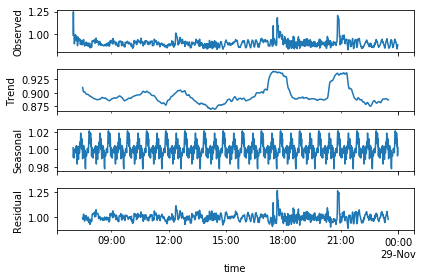

In [9]:
# Seasonal Decomposition of the data set 
result = seasonal_decompose(df, model = "multiplicative", freq = 60)
result.plot();
